In [5]:
import pandas as pd
df_all = pd.read_csv('C:\\Users\\Brend\\Downloads\\correlation_top42_v2.csv', index_col = 'name', encoding = "UTF-8")
print("Total: %d authors" % df_all.shape[0])

Total: 1965872 authors


In [23]:
df_trimmed = df_all[df_all['num_pubs'] >= 50]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 25]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 368618 authors


In [24]:
linear_metrics = ['pct_collab_linauth', 'pct_collab_linprof', 
                  'pct_collab_sqrtauth', 'pct_collab_sqrtprof', 
                  'pct_collab_unweighted']
log_metrics = []
all_metrics = linear_metrics + log_metrics
impact = ['avg_PR', 'max_PR', 'avg_AR', 'max_AR']


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

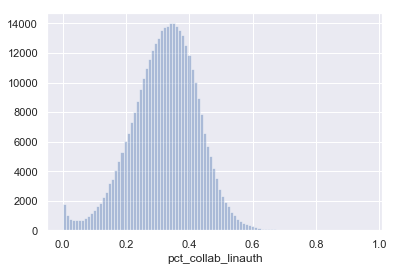

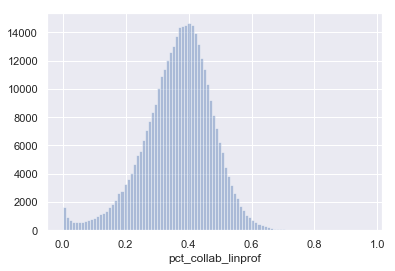

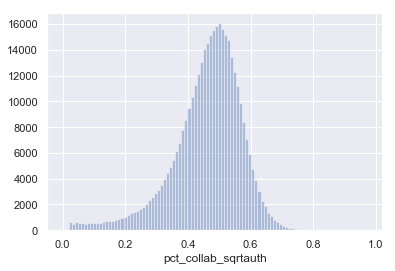

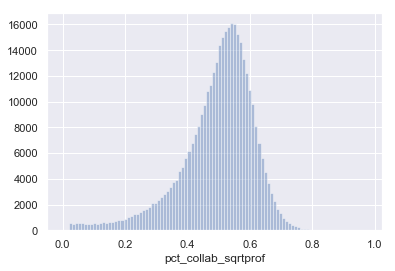

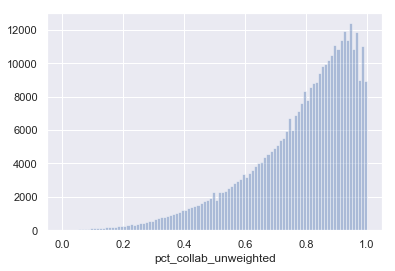

In [28]:
for col in linear_metrics:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    plt.show()

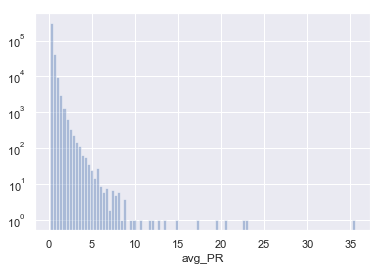

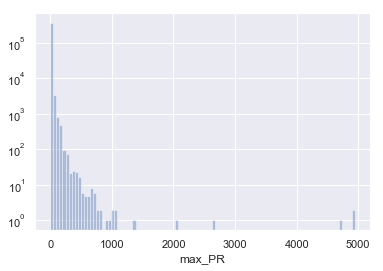

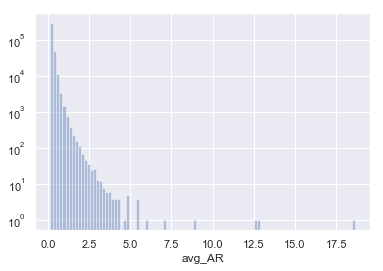

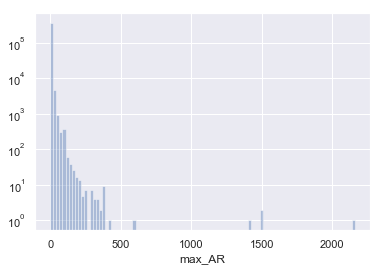

In [29]:
for col in impact:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    ax.set_yscale('log')
    plt.show()

In [30]:
df_log = df_trimmed.copy()
for col in df_trimmed.columns:
    log_col = df_log[[col]]
    df_log[col + '_log'] = log_col.apply(np.log, axis=0)
df_log = df_log[[col for col in df_log.columns if 'log' in col]]

In [31]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_trimmed.copy()
for col in df_trimmed.columns:
    ss = StandardScaler()
    scaled_col = df_scaled[[col]]
    df_scaled[col + '_zscore'] = ss.fit_transform(scaled_col)
df_zscores = df_scaled[[col for col in df_scaled.columns if 'zscore' in col]]

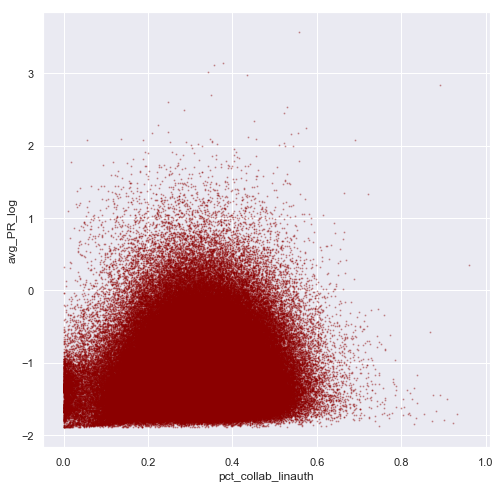

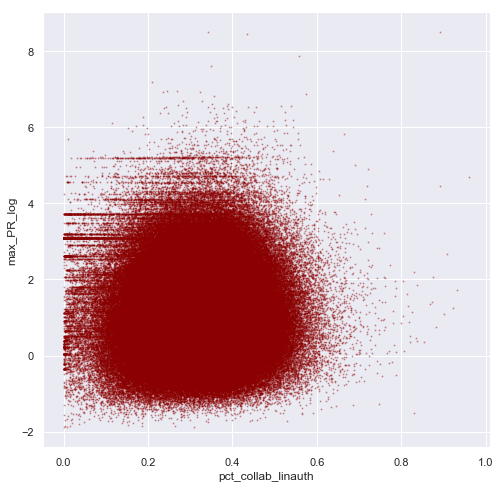

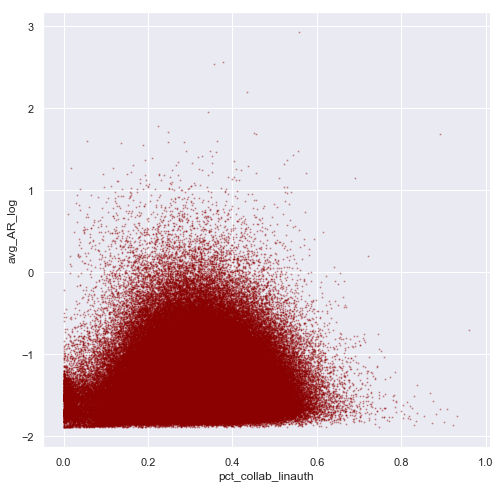

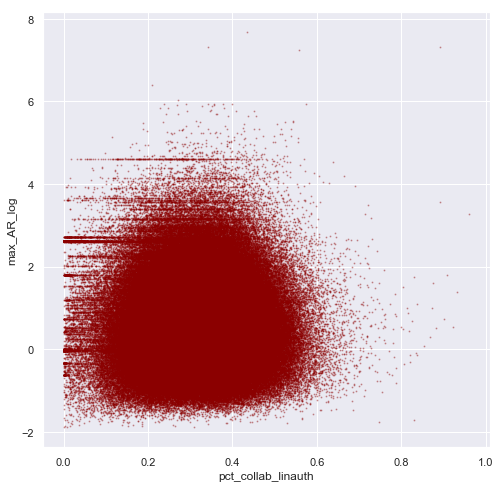

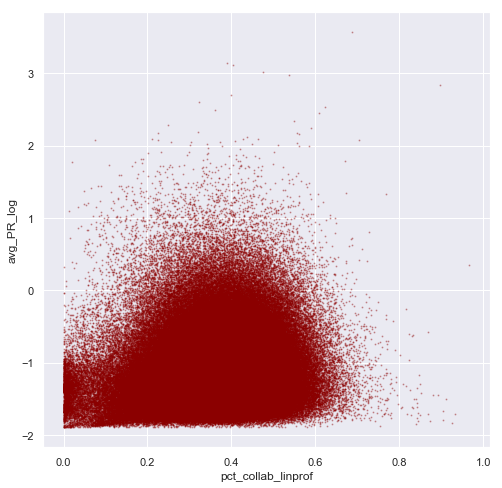

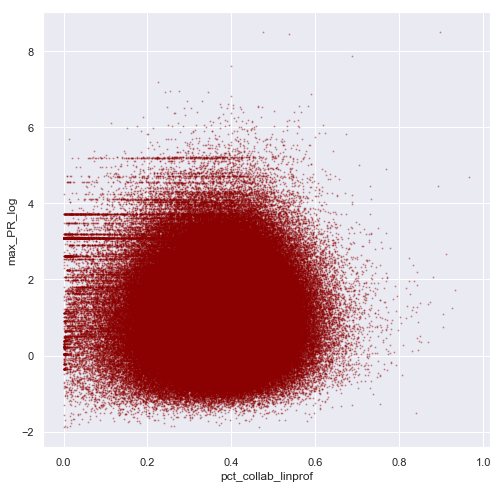

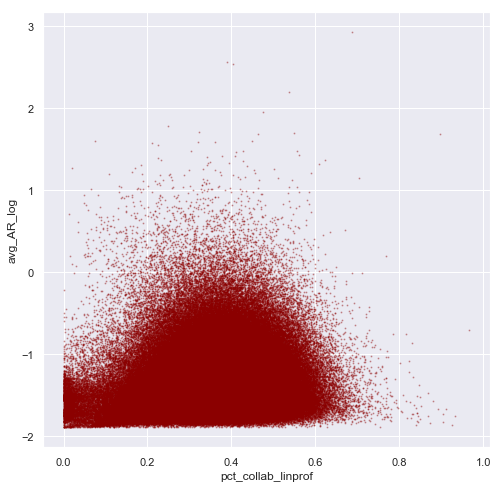

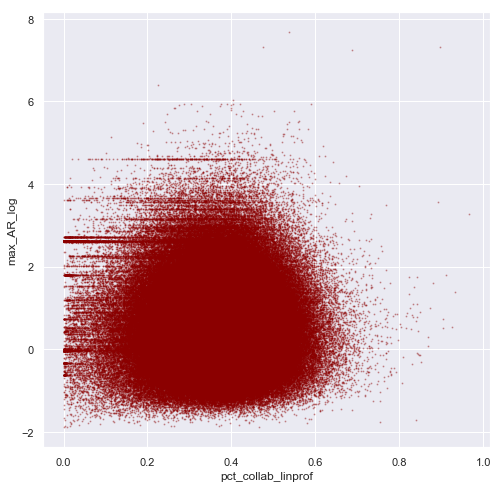

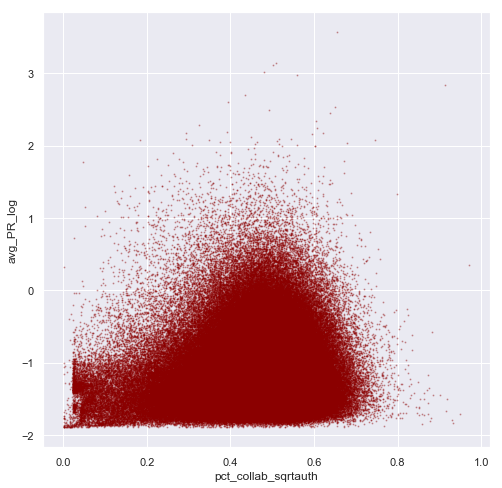

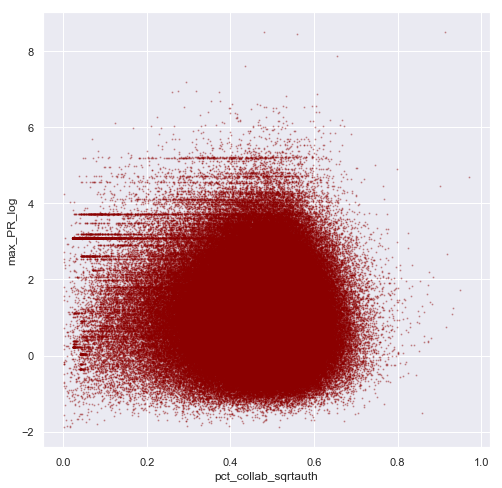

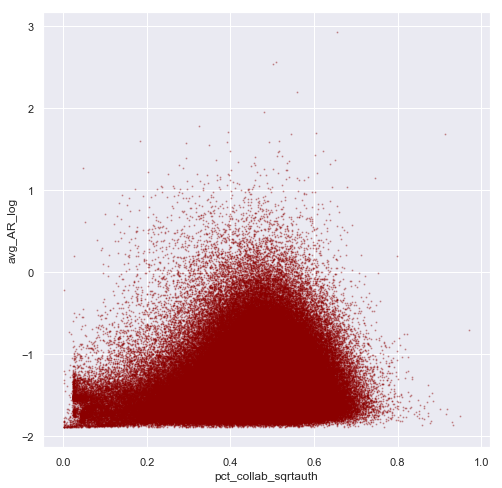

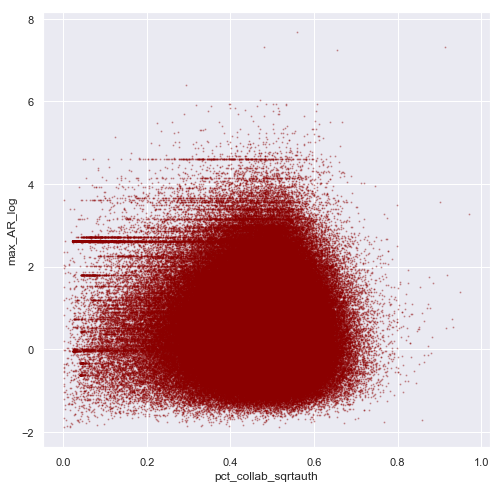

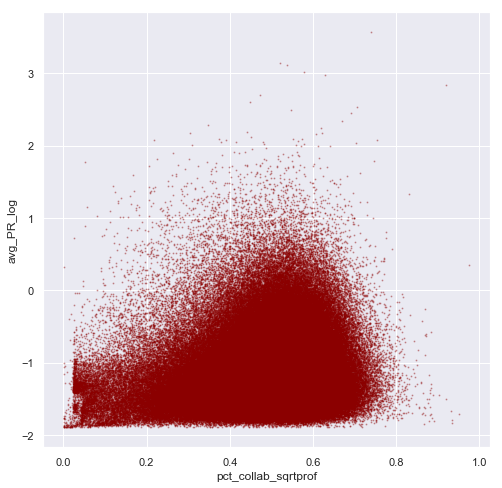

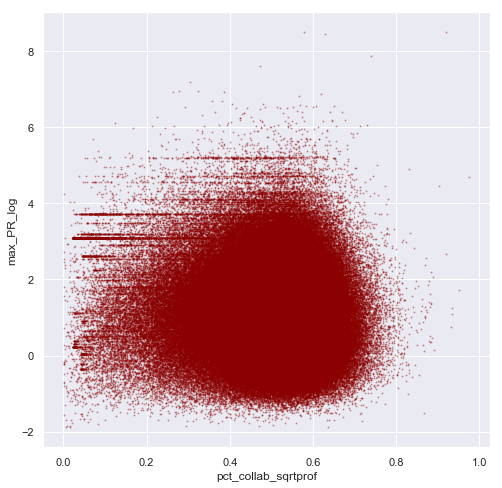

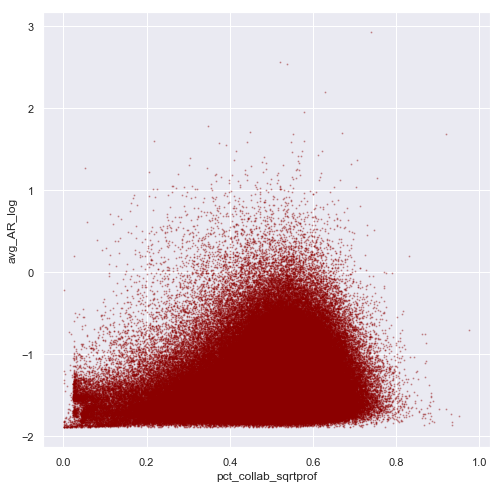

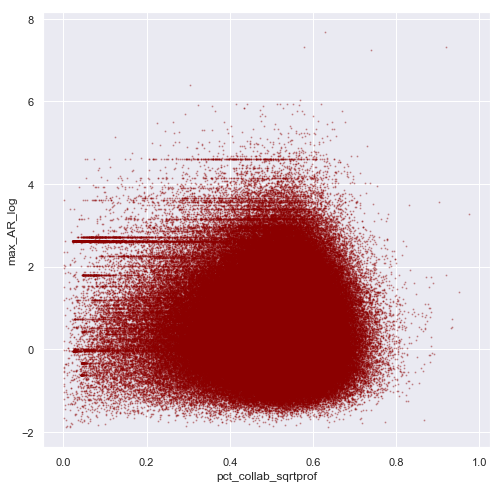

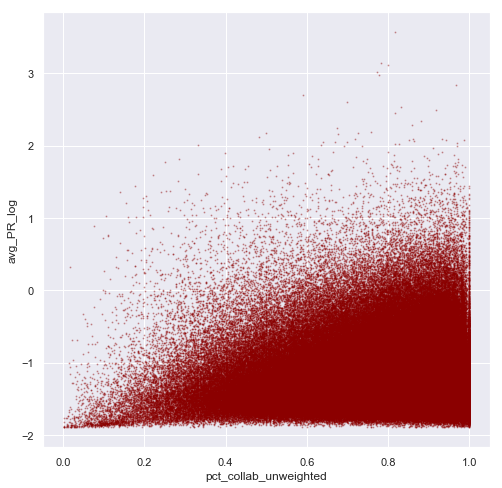

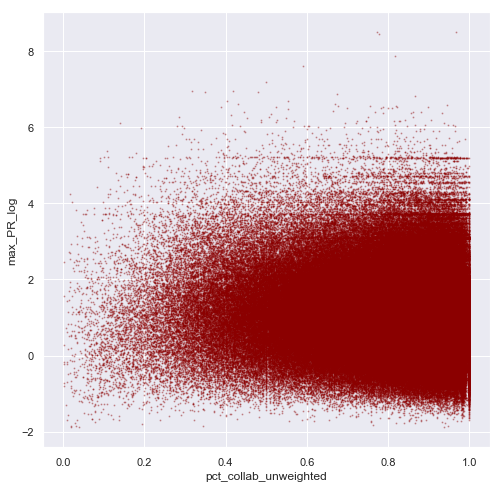

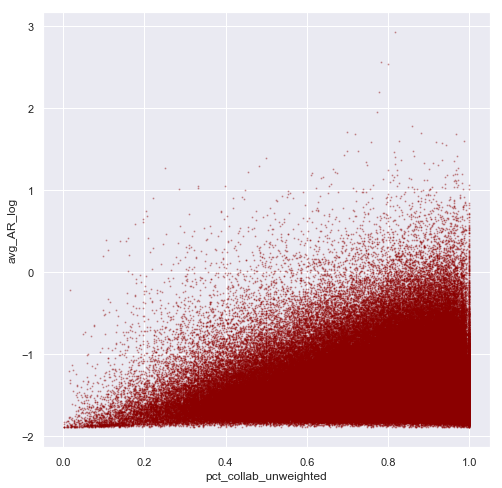

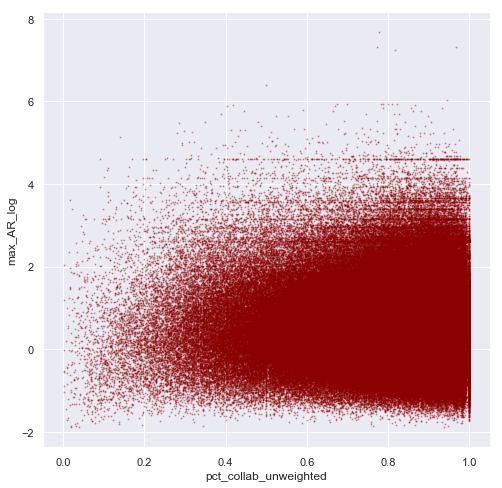

In [32]:
for x_col in linear_metrics:
    for y_col in impact:
        data = pd.concat([df_trimmed[[x_col]], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col, y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()
